<a href="https://colab.research.google.com/github/Maneeshkumar08/My-project-/blob/main/Breast_Cancer_Prediction_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
zip_path ='/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast'
extract_path = '/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast'

In [7]:
import zipfile, os

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_file:
        zip_file.extractall(extract_path)
    print(f"Extracted contents to: {extract_path}")
else:
    print("Dataset already extracted.")

Dataset already extracted.


# New Section

In [8]:
import os

for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files[:5]:
        print(f"{subindent}{f}")
    if level > 2:
        break

breast/
    README.txt
    count_files.sh
    benign/
        README_B.txt
        adenosis.stat.txt
        fibroadenoma.stat.txt
        phyllodes_tumor.stat.txt
        process_db_stat.py
        SOB/
            adenosis/


In [10]:
dataset_dir = '/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast'

print("Checking dataset structure...")
for f in os.listdir(dataset_dir):
    print(f)

Checking dataset structure...
benign
README.txt
count_files.sh
malignant


In [11]:
import pathlib

all_images = list(pathlib.Path(dataset_dir).rglob('*.png'))
print(f"\n Total image files found: {len(all_images)}")

print("\nSample image paths:")
for img in all_images[:5]:
    print(img)



 Total image files found: 2962

Sample image paths:
/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-006.png
/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png
/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png
/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-008.png
/content/drive/MyDrive/test/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-009.png


In [ ]:
import pandas as pd

records = []
for path in all_images:
    parts = path.parts
    label = 'benign' if 'benign' in parts else 'malignant'
    subtype = parts[-5]
    magnification = parts[-2]
    records.append((str(path), label, subtype, magnification))

df = pd.DataFrame(records, columns=['path', 'label', 'subtype', 'magnification'])
print("\nDataFrame created successfully!")
print(df.head())


DataFrame created successfully!
                                                path      label subtype  \
0  /content/BreaKHis/BreaKHis_v1/BreaKHis_v1/hist...  malignant     SOB   
1  /content/BreaKHis/BreaKHis_v1/BreaKHis_v1/hist...  malignant     SOB   
2  /content/BreaKHis/BreaKHis_v1/BreaKHis_v1/hist...  malignant     SOB   
3  /content/BreaKHis/BreaKHis_v1/BreaKHis_v1/hist...  malignant     SOB   
4  /content/BreaKHis/BreaKHis_v1/BreaKHis_v1/hist...  malignant     SOB   

  magnification  
0          100X  
1          100X  
2          100X  
3          100X  
4          100X  


In [ ]:
print("\n Summary Information:")
print("Total images:", len(df))
print("\nClass distribution:")
print(df['label'].value_counts())
print("\nSubtype distribution:")
print(df['subtype'].value_counts())
print("\nMagnification distribution:")
print(df['magnification'].value_counts())


 Summary Information:
Total images: 4393

Class distribution:
label
benign       2480
malignant    1913
Name: count, dtype: int64

Subtype distribution:
subtype
SOB    4393
Name: count, dtype: int64

Magnification distribution:
magnification
100X    1160
40X     1109
200X    1105
400X    1019
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

print("\n Basic dataset overview:")
print(df.describe(include='all'))
print("\nUnique magnifications:", df['magnification'].unique())


 Basic dataset overview:
                                                     path   label subtype  \
count                                                4393    4393    4393   
unique                                               4393       2       1   
top     /content/BreaKHis/BreaKHis_v1/BreaKHis_v1/hist...  benign     SOB   
freq                                                    1    2480    4393   

       magnification  
count           4393  
unique             4  
top             100X  
freq            1160  

Unique magnifications: ['100X' '400X' '200X' '40X']


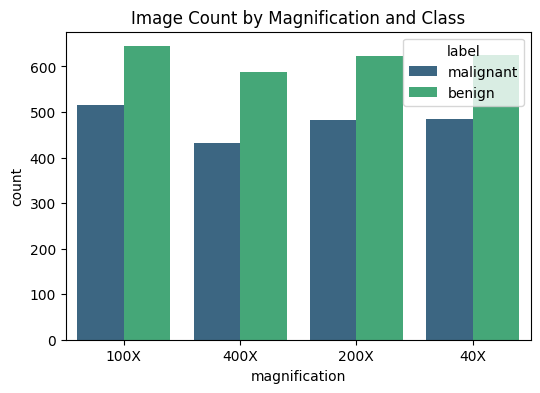

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='magnification', data=df, hue='label', palette='viridis')
plt.title('Image Count by Magnification and Class')
plt.show()

/tmp/ipython-input-4031147241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='coolwarm')


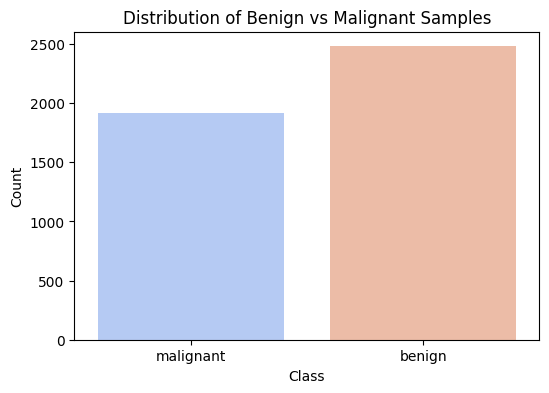

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='coolwarm')
plt.title('Distribution of Benign vs Malignant Samples')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


 Benign examples:


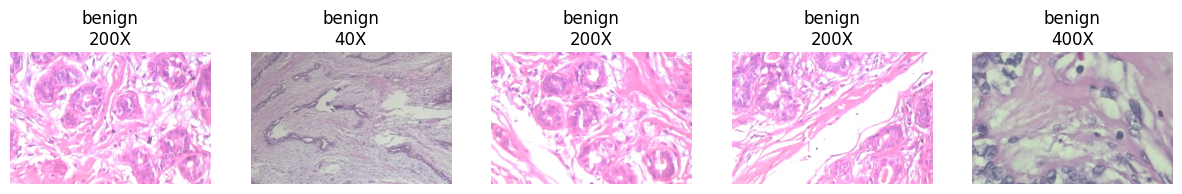


 Malignant examples:


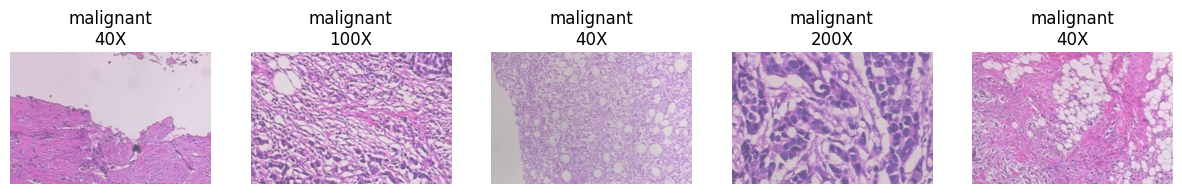

In [ ]:
import random
from matplotlib.image import imread

def show_random_images(df, label, n=5):
    subset = df[df['label'] == label].sample(n)
    plt.figure(figsize=(15,3))
    for i, (_, row) in enumerate(subset.iterrows()):
        img = imread(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{label}\n{row['magnification']}")
    plt.show()

print("\n Benign examples:")
show_random_images(df, 'benign', 5)

print("\n Malignant examples:")
show_random_images(df, 'malignant', 5)

In [ ]:
#load libraries and split data
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import os
import itertools

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

train_df, temp_df = train_test_split(df, test_size=0.30, stratify=df['label'], random_state=SEED)
val_df, test_df  = train_test_split(temp_df, test_size=0.50, stratify=temp_df['label'], random_state=SEED)

print("Split sizes:", len(train_df), len(val_df), len(test_df))
print("Train distribution:\n", train_df['label'].value_counts())
print("Val distribution:\n", val_df['label'].value_counts())
print("Test distribution:\n", test_df['label'].value_counts())

Split sizes: 3075 659 659
Train distribution:
 label
benign       1736
malignant    1339
Name: count, dtype: int64
Val distribution:
 label
benign       372
malignant    287
Name: count, dtype: int64
Test distribution:
 label
benign       372
malignant    287
Name: count, dtype: int64


In [ ]:
#to set basic parameters and convert labels for model training
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
AUTOTUNE = tf.data.AUTOTUNE
NUM_CLASSES = df['label'].nunique()

label_to_index = {'benign':0, 'malignant':1}
index_to_label = {v:k for k,v in label_to_index.items()}

In [ ]:
#take orginal image and return processed image tensor with path&labels
def process_path(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, IMG_SIZE)
    return img, label

In [ ]:
# converts pandas dataframe in tensorflow dataframe with paths
def df_to_dataset(dataframe, shuffle=True, augment=False):
    paths = dataframe['path'].values
    labels = np.array([label_to_index[l] for l in dataframe['label'].values], dtype=np.int32)
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(paths), seed=SEED)
    ds = ds.map(lambda p, l: process_path(p, l), num_parallel_calls=AUTOTUNE)
    if augment:
        ds = ds.map(lambda x, y: (data_augment(x, training=True), y), num_parallel_calls=AUTOTUNE)
    ds = ds.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return ds

In [ ]:
#data augmentation pipeline which randomly flips,rotates, zooms and shifts.
data_augment = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.15),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.05, 0.05)
], name='data_augmentation')

In [ ]:
#creates a tensorflow dataset for train,test and val.
train_ds = df_to_dataset(train_df, shuffle=True, augment=True)
val_ds   = df_to_dataset(val_df, shuffle=False, augment=False)
test_ds  = df_to_dataset(test_df, shuffle=False, augment=False)

In [ ]:
#used for class imbalance calculate class weights and balance to ensure model treats equally
y_train = train_df['label'].map(label_to_index).values
cw = class_weight.compute_class_weight(class_weight='balanced',
                                      classes=np.unique(y_train),
                                      y=y_train)
class_weights = {i: float(w) for i, w in enumerate(cw)}
print("Class weights:", class_weights)


Class weights: {0: 0.8856566820276498, 1: 1.1482449589245707}


In [ ]:
#it build and compiles Efficient NetBO for image classification
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = tf.keras.applications.efficientnet.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,213,797 (16.07 MB)

 Trainable params: 164,226 (641.51 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
# define callbacks that helps in control and improve training
checkpoint_path = '/content/drive/MyDrive/breakhis_effnet_checkpoint.h5'
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

In [ ]:
#installs Keras Tuner, a library for automating hyperparameter tuning in Keras models.
!pip install -q keras-tuner

import keras_tuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.0 MB/s eta 0:00:00


In [ ]:
#builds a tunnable classificatin model using keras for optimisation
def build_model(hp):
    base = tf.keras.applications.EfficientNetB0(
        input_shape=IMG_SIZE + (3,),
        include_top=False,
        weights='imagenet'
    )
    base.trainable = hp.Choice('base_trainable', [False, True])
    inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
    x = tf.keras.applications.efficientnet.preprocess_input(inputs)
    x = base(x, training=base.trainable)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(hp.Float('dropout_1', 0.0, 0.5, step=0.1))(x)
    units = hp.Int('dense_units', min_value=64, max_value=512, step=64)
    x = tf.keras.layers.Dense(units, activation=hp.Choice('dense_activation', ['relu', 'swish']))(x)
    x = tf.keras.layers.Dropout(hp.Float('dropout_2', 0.0, 0.5, step=0.1))(x)
    outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)

    opt_choice = hp.Choice('optimizer', ['adam', 'adamw', 'rmsprop'])
    lr = hp.Float('learning_rate', 1e-5, 1e-3, sampling='log')

    if opt_choice == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=lr)
    elif opt_choice == 'adamw':
        opt = tf.keras.optimizers.experimental.AdamW(learning_rate=lr)
    else:
        opt = tf.keras.optimizers.RMSprop(learning_rate=lr)

    model.compile(
        optimizer=opt,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [ ]:
#set up random search optimisation function for validation and best results
import keras_tuner as kt

tuner_dir = '/content/kt_tuner_minimal'
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=2,
    executions_per_trial=1,
    directory=tuner_dir,
    project_name='breakhis_random_minimal',
    seed=SEED,
    overwrite=True
)


In [ ]:
#creates earlystopping call back if val_loss doesnt improve and restore best model weights
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

In [ ]:
#runs parameter search on train_ds and gives nest parameters and models
tuner.search(
    train_ds,
    validation_data=val_ds,
    epochs=3,
    callbacks=[stop_early],
    class_weight=class_weights
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

Trial 2 Complete [00h 05m 35s]
val_accuracy: 0.5644916296005249

Best val_accuracy So Far: 0.5644916296005249
Total elapsed time: 00h 05m 41s


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
# retrives top performing para and models
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
# train wiht class weights and learning rate reduction callback that halves the rate when val_loss

history_best = best_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    class_weight=class_weights,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)]
)

Epoch 1/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.4957 - loss: 0.7037 - val_accuracy: 0.5645 - val_loss: 0.6895 - learning_rate: 1.5159e-05
Epoch 2/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 83s 857ms/step - accuracy: 0.5071 - loss: 0.7027 - val_accuracy: 0.4355 - val_loss: 0.6944 - learning_rate: 1.5159e-05
Epoch 3/5
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.4851 - loss: 0.7052
Epoch 3: ReduceLROnPlateau reducing learning rate to 7.579659722978249e-06.
97/97 ━━━━━━━━━━━━━━━━━━━━ 83s 858ms/step - accuracy: 0.4852 - loss: 0.7051 - val_accuracy: 0.4355 - val_loss: 0.6933 - learning_rate: 1.5159e-05
Epoch 4/5
97/97 ━━━━━━━━━━━━━━━━━━━━ 84s 871ms/step - accuracy: 0.5085 - loss: 0.7000 - val_accuracy: 0.4355 - val_loss: 0.6946 - learning_rate: 7.5797e-06
Epoch 5/5
96/97 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.5087 - loss: 0.6982
Epoch 5: ReduceLROnPlateau reducing learning rate to 3.7898298614891246e-06.
97/97 ━━━━━━━━━━━━━━━━━━━━ 82s 846ms/step - accuracy: 0.5085 - lo

In [ ]:
# check loss and accuracy on the best val& test.
val_loss, val_acc = best_model.evaluate(val_ds)
test_loss, test_acc = best_model.evaluate(test_ds)

38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step - accuracy: 0.3268 - loss: 0.7038
38/38 ━━━━━━━━━━━━━━━━━━━━ 24s 621ms/step - accuracy: 0.3059 - loss: 0.7050


In [ ]:
best_model.save('/content/drive/MyDrive/breakhis_effnet_tuned.h5')

In [ ]:
print("Best hyperparameters:")
for param in best_hps.values:
    print(param, best_hps.get(param))

Best hyperparameters:
base_trainable 0
dropout_1 0.2
dense_units 128
dense_activation swish
dropout_2 0.30000000000000004
optimizer rmsprop
learning_rate 1.5159319577885927e-05


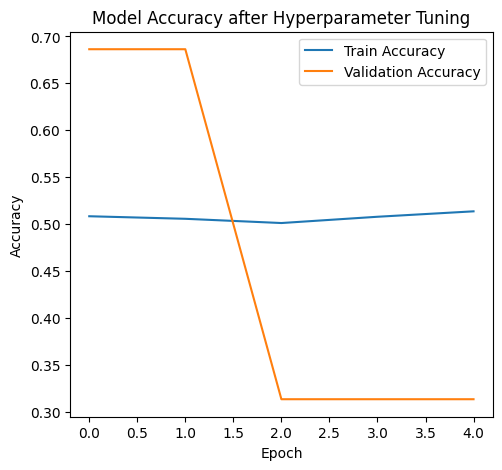

In [ ]:
history = history_best

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy after Hyperparameter Tuning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

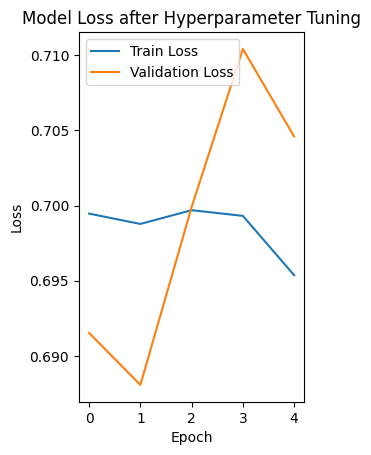

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss after Hyperparameter Tuning')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#use best models to predict labels in dataset
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = best_model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)
report = classification_report(y_true, y_pred, target_names=['benign', 'malignant'])
print(report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
